In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
# Read the data
data = pd.read_csv("C:/Users/Pearl/Downloads/insurance.csv")

# Convert categorical data into dummy variables
data = pd.get_dummies(data, drop_first=True)

In [7]:
# Splitting the data into train and test sets
train, test = train_test_split(data, test_size=0.2, random_state=123)

# Model using all variables
X_train = train.drop("charges", axis=1)
y_train = train["charges"]
X_test = test.drop("charges", axis=1)
y_test = test["charges"]

model_0 = LinearRegression()
model_0.fit(X_train, y_train)
predictions_0 = model_0.predict(X_test)

In [8]:
# Calculate R-squared and RMSE for the first model
r_sq_0 = model_0.score(X_test, y_test)
rmse_0 = np.sqrt(mean_squared_error(y_test, predictions_0))

# Model without the 'sex_male' variable
X_train_1 = X_train.drop('sex_male', axis=1)
X_test_1 = X_test.drop('sex_male', axis=1)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train)
predictions_1 = model_1.predict(X_test_1)

# Calculate R-squared and RMSE for the new model
r_sq_1 = model_1.score(X_test_1, y_test)
rmse_1 = np.sqrt(mean_squared_error(y_test, predictions_1))

In [9]:
# Display performance metrics for both models.
print(f"R-squared for first model: {r_sq_0:.4f}")
print(f"R-squared for new model: {r_sq_1:.4f}")
print(f"RMSE for first model: {rmse_0:.2f}")
print(f"RMSE for new model: {rmse_1:.2f}")

R-squared for first model: 0.8002
R-squared for new model: 0.8001
RMSE for first model: 5527.43
RMSE for new model: 5528.47


In [10]:
# Predictions on new data
Bob = pd.DataFrame({
    'age': [19],
    'bmi': [27.9],
    'children': [0],
    'smoker_yes': [1],
    'region_northwest': [1],
    'region_southeast': [0],
    'region_southwest': [0]
})

Lisa = pd.DataFrame({
    'age': [40],
    'bmi': [50],
    'children': [2],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

John = pd.DataFrame({
    'age': [30],
    'bmi': [31.2],
    'children': [0],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [0],
    'region_southwest': [0]
})

Health care charges for Bob: $25622.80
Health care charges for Lisa: $15349.25
Health care charges for John: $6488.48


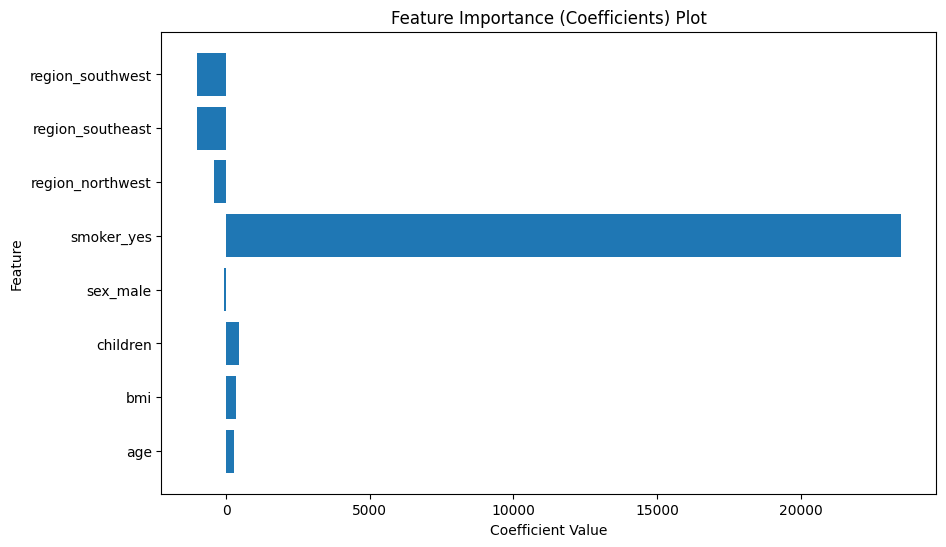

In [11]:
print(f"Health care charges for Bob: ${model_1.predict(Bob)[0]:.2f}")
print(f"Health care charges for Lisa: ${model_1.predict(Lisa)[0]:.2f}")
print(f"Health care charges for John: ${model_1.predict(John)[0]:.2f}")


# Get the coefficients of the model
coefficients = model_0.coef_

# Get the feature names
feature_names = X_train.columns

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Coefficients) Plot')
plt.show()